<a href="https://colab.research.google.com/github/Moe-404/ML-Course-Final-Project/blob/main/PROJECT1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1-Import libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt

#2- Load Data

In [ ]:
client_train = pd.read_csv('/content/client_train.csv')
invoice_train = pd.read_csv('/content/invoice_train.csv')
client_test = pd.read_csv('/content/client_test.csv')
invoice_test = pd.read_csv('/content/invoice_test.csv')

In [ ]:
dataFrame =  pd.merge(client_train, invoice_train)

#3- Exploratory data analysis

In [ ]:
client_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135493 entries, 0 to 135492
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   disrict        135493 non-null  int64  
 1   client_id      135493 non-null  object 
 2   client_catg    135493 non-null  int64  
 3   region         135493 non-null  int64  
 4   creation_date  135493 non-null  object 
 5   target         135493 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 6.2+ MB


In [ ]:
invoice_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432526 entries, 0 to 432525
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   client_id             432526 non-null  object 
 1   invoice_date          432526 non-null  object 
 2   tarif_type            432526 non-null  int64  
 3   counter_number        432526 non-null  int64  
 4   counter_statue        432526 non-null  int64  
 5   counter_code          432526 non-null  int64  
 6   reading_remarque      432526 non-null  int64  
 7   counter_coefficient   432526 non-null  int64  
 8   consommation_level_1  432525 non-null  float64
 9   consommation_level_2  432525 non-null  float64
 10  consommation_level_3  432525 non-null  float64
 11  consommation_level_4  432525 non-null  float64
 12  old_index             432525 non-null  float64
 13  new_index             432525 non-null  float64
 14  months_number         432525 non-null  float64
 15  

In [ ]:
dataFrame.shape

(432526, 21)

In [ ]:
dataFrame.head()

,disrict,client_id,client_catg,region,creation_date,target,invoice_date,tarif_type,counter_number,counter_statue,...,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,60,train_Client_0,11,101,31/12/1994,0.0,2014-03-24,11,1335667,0,...,8,1,82.0,0.0,0.0,0.0,14302.0,14384.0,4.0,ELEC
1,60,train_Client_0,11,101,31/12/1994,0.0,2013-03-29,11,1335667,0,...,6,1,1200.0,184.0,0.0,0.0,12294.0,13678.0,4.0,ELEC
2,60,train_Client_0,11,101,31/12/1994,0.0,2015-03-23,11,1335667,0,...,8,1,123.0,0.0,0.0,0.0,14624.0,14747.0,4.0,ELEC
3,60,train_Client_0,11,101,31/12/1994,0.0,2015-07-13,11,1335667,0,...,8,1,102.0,0.0,0.0,0.0,14747.0,14849.0,4.0,ELEC
4,60,train_Client_0,11,101,31/12/1994,0.0,2016-11-17,11,1335667,0,...,9,1,572.0,0.0,0.0,0.0,15066.0,15638.0,12.0,ELEC


In [ ]:
col_names = dataFrame.columns

col_names

Index(['disrict', 'client_id', 'client_catg', 'region', 'creation_date',
       'target', 'invoice_date', 'tarif_type', 'counter_number',
       'counter_statue', 'counter_code', 'reading_remarque',
       'counter_coefficient', 'consommation_level_1', 'consommation_level_2',
       'consommation_level_3', 'consommation_level_4', 'old_index',
       'new_index', 'months_number', 'counter_type'],
      dtype='object')

In [ ]:
categorical = [var for var in dataFrame.columns if dataFrame[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 4 categorical variables

The categorical variables are : ['client_id', 'creation_date', 'invoice_date', 'counter_type']


In [ ]:
dataFrame[categorical].head()

,client_id,creation_date,invoice_date,counter_type
0,train_Client_0,31/12/1994,2014-03-24,ELEC
1,train_Client_0,31/12/1994,2013-03-29,ELEC
2,train_Client_0,31/12/1994,2015-03-23,ELEC
3,train_Client_0,31/12/1994,2015-07-13,ELEC
4,train_Client_0,31/12/1994,2016-11-17,ELEC


Explore problems

In [ ]:
dataFrame[categorical].isnull().sum()

client_id        0
creation_date    0
invoice_date     0
counter_type     1
dtype: int64

no missing values

Frequency counts

In [ ]:
for var in categorical:

    print(dataFrame[var].value_counts())
    print("===========================\n")

train_Client_107082    298
train_Client_103744    280
train_Client_101645    254
train_Client_111177    247
train_Client_108283    235
                      ... 
train_Client_110179      1
train_Client_105529      1
train_Client_110203      1
train_Client_111242      1
train_Client_103933      1
Name: client_id, Length: 12920, dtype: int64

31/12/2004    1887
13/10/1980    1463
20/11/1997    1224
31/12/1998     926
31/12/1996     905
              ... 
27/06/1979       1
07/08/2018       1
27/07/2018       1
25/03/2019       1
02/06/2017       1
Name: creation_date, Length: 5111, dtype: int64

2019-03-09    384
2017-05-09    323
2019-02-07    317
2017-03-05    312
2017-02-08    309
             ... 
1998-02-07      1
2004-10-28      1
2004-03-25      1
1982-09-15      1
1997-11-06      1
Name: invoice_date, Length: 4705, dtype: int64

ELEC    296476
GAZ     136049
Name: counter_type, dtype: int64



Number of labels

In [ ]:
for var in categorical:

    print(var, ' contains ', len(dataFrame[var].unique()), ' labels')

client_id  contains  12920  labels
creation_date  contains  5111  labels
invoice_date  contains  4705  labels
counter_type  contains  3  labels


Feature Engineering of creation_date Variable

In [ ]:
if not pd.api.types.is_datetime64_any_dtype(dataFrame['creation_date']):
    # Convert the Creation date column to a datetime format
    dataFrame['creation_date'] = pd.to_datetime(dataFrame['creation_date'])

<ipython-input-15-fc65dd00fd48>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  dataFrame['creation_date'] = pd.to_datetime(dataFrame['creation_date'])


In [ ]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 432526 entries, 0 to 432525
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   disrict               432526 non-null  int64         
 1   client_id             432526 non-null  object        
 2   client_catg           432526 non-null  int64         
 3   region                432526 non-null  int64         
 4   creation_date         432526 non-null  datetime64[ns]
 5   target                432526 non-null  float64       
 6   invoice_date          432526 non-null  object        
 7   tarif_type            432526 non-null  int64         
 8   counter_number        432526 non-null  int64         
 9   counter_statue        432526 non-null  int64         
 10  counter_code          432526 non-null  int64         
 11  reading_remarque      432526 non-null  int64         
 12  counter_coefficient   432526 non-null  int64         
 13 

In [ ]:
(dataFrame.creation_date).describe()

<ipython-input-17-eebbc61dfcfc>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  (dataFrame.creation_date).describe()


count                  432526
unique                   5111
top       2004-12-31 00:00:00
freq                     1887
first     1977-02-17 00:00:00
last      2019-12-07 00:00:00
Name: creation_date, dtype: object

In [ ]:
dataFrame['year_creation_date'] = dataFrame['creation_date'].dt.year

dataFrame['year_creation_date'].head()

0    1994
1    1994
2    1994
3    1994
4    1994
Name: year_creation_date, dtype: int64

In [ ]:
len(dataFrame['year_creation_date'].unique())

43

In [ ]:
dataFrame['Month_creation_date'] = dataFrame['creation_date'].dt.month

dataFrame['Month_creation_date'].head()

0    12
1    12
2    12
3    12
4    12
Name: Month_creation_date, dtype: int64

In [ ]:
dataFrame['Day_creation_date'] = dataFrame['creation_date'].dt.day

dataFrame['Day_creation_date'].head()

0    31
1    31
2    31
3    31
4    31
Name: Day_creation_date, dtype: int64

In [ ]:
pd.to_datetime(dataFrame.creation_date).describe()

<ipython-input-22-13cb2173ceaf>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  pd.to_datetime(dataFrame.creation_date).describe()


count                  432526
unique                   5111
top       2004-12-31 00:00:00
freq                     1887
first     1977-02-17 00:00:00
last      2019-12-07 00:00:00
Name: creation_date, dtype: object

In [ ]:
dataFrame.drop('creation_date', axis=1, inplace = True)

In [ ]:
dataFrame.head()

,disrict,client_id,client_catg,region,target,invoice_date,tarif_type,counter_number,counter_statue,counter_code,...,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type,year_creation_date,Month_creation_date,Day_creation_date
0,60,train_Client_0,11,101,0.0,2014-03-24,11,1335667,0,203,...,0.0,0.0,0.0,14302.0,14384.0,4.0,ELEC,1994,12,31
1,60,train_Client_0,11,101,0.0,2013-03-29,11,1335667,0,203,...,184.0,0.0,0.0,12294.0,13678.0,4.0,ELEC,1994,12,31
2,60,train_Client_0,11,101,0.0,2015-03-23,11,1335667,0,203,...,0.0,0.0,0.0,14624.0,14747.0,4.0,ELEC,1994,12,31
3,60,train_Client_0,11,101,0.0,2015-07-13,11,1335667,0,207,...,0.0,0.0,0.0,14747.0,14849.0,4.0,ELEC,1994,12,31
4,60,train_Client_0,11,101,0.0,2016-11-17,11,1335667,0,207,...,0.0,0.0,0.0,15066.0,15638.0,12.0,ELEC,1994,12,31


Feature Engineering of invoice_date Variable

In [ ]:
dataFrame['invoice_date'].dtypes

In [ ]:
if not pd.api.types.is_datetime64_any_dtype(dataFrame['invoice_date']):
    # Convert the Creation date column to a datetime format
    dataFrame['invoice_date'] = pd.to_datetime(dataFrame['invoice_date'])

In [ ]:
(dataFrame.invoice_date).describe()

<ipython-input-28-308f0a2794da>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  (dataFrame.invoice_date).describe()


count                  432526
unique                   4705
top       2019-03-09 00:00:00
freq                      384
first     1978-10-26 00:00:00
last      2019-12-07 00:00:00
Name: invoice_date, dtype: object

In [ ]:
dataFrame['year_invoice_date'] = dataFrame['invoice_date'].dt.year

dataFrame['year_invoice_date'].head()

0    2014
1    2013
2    2015
3    2015
4    2016
Name: year_invoice_date, dtype: int64

In [ ]:
len(dataFrame['year_invoice_date'].unique())

42

In [ ]:
dataFrame['Day_invoice_date'] = dataFrame['invoice_date'].dt.day

dataFrame['Day_invoice_date'].head()

0    24
1    29
2    23
3    13
4    17
Name: Day_invoice_date, dtype: int64

In [ ]:
dataFrame.drop('invoice_date', axis=1, inplace = True)

In [ ]:
print('Unique counter_statue :', dataFrame['counter_statue'].nunique())

Unique counter_statue : 6


In [ ]:
print("Unique values of counter_statue" , dataFrame['counter_statue'].unique())

Unique values of counter_statue [0 1 5 4 3 2]


In [ ]:
print('Count samples for each value :\n', dataFrame['counter_statue'].value_counts())

In [ ]:
dataFrame['counter_statue'] = [0 if i == '0' else i for i in dataFrame['counter_statue']]
dataFrame['counter_statue'] = [1 if i == '1' else i for i in dataFrame['counter_statue']]
dataFrame['counter_statue'] = [4 if i == '4' else i for i in dataFrame['counter_statue']]
dataFrame['counter_statue'] = [5 if i == '5' else i for i in dataFrame['counter_statue']]
dataFrame['counter_statue'] = [4 if i ==  5  else i for i in dataFrame['counter_statue']]

In [ ]:
print('Unique values of counter_statue: ' , dataFrame['counter_statue'].unique())

Unique values of counter_statue:  [0 1 4 3 2]


In [ ]:
dataFrame.shape

In [ ]:
values_to_drop = ['A', 618, 269375, 46, 420 , 769]

# Drop the rows that contain the values to drop using boolean indexing
dataFrame = dataFrame[~dataFrame['counter_statue'].isin(values_to_drop)]

In [ ]:
dataFrame.shape

(432526, 24)

Explore counter_type variable

In [ ]:
print('counter_type contains', len(dataFrame['counter_type'].unique()), 'labels')

counter_type contains 3 labels


In [ ]:
dataFrame['counter_type'].unique()

array(['ELEC', 'GAZ', nan], dtype=object)

In [ ]:
dataFrame.counter_type.value_counts()

ELEC    296476
GAZ     136049
Name: counter_type, dtype: int64

Explore Numerical Variables

In [ ]:
numerical = [var for var in dataFrame.columns if dataFrame[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 22 numerical variables

The numerical variables are : ['disrict', 'client_catg', 'region', 'target', 'tarif_type', 'counter_number', 'counter_statue', 'counter_code', 'reading_remarque', 'counter_coefficient', 'consommation_level_1', 'consommation_level_2', 'consommation_level_3', 'consommation_level_4', 'old_index', 'new_index', 'months_number', 'year_creation_date', 'Month_creation_date', 'Day_creation_date', 'year_invoice_date', 'Day_invoice_date']


In [ ]:
dataFrame[numerical].head()

,disrict,client_catg,region,target,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,...,consommation_level_3,consommation_level_4,old_index,new_index,months_number,year_creation_date,Month_creation_date,Day_creation_date,year_invoice_date,Day_invoice_date
0,60,11,101,0.0,11,1335667,0,203,8,1,...,0.0,0.0,14302.0,14384.0,4.0,1994,12,31,2014,24
1,60,11,101,0.0,11,1335667,0,203,6,1,...,0.0,0.0,12294.0,13678.0,4.0,1994,12,31,2013,29
2,60,11,101,0.0,11,1335667,0,203,8,1,...,0.0,0.0,14624.0,14747.0,4.0,1994,12,31,2015,23
3,60,11,101,0.0,11,1335667,0,207,8,1,...,0.0,0.0,14747.0,14849.0,4.0,1994,12,31,2015,13
4,60,11,101,0.0,11,1335667,0,207,9,1,...,0.0,0.0,15066.0,15638.0,12.0,1994,12,31,2016,17


Explore problems within numerical variables

In [ ]:
print(round(dataFrame[numerical].describe()),2)

        disrict  client_catg    region    target  tarif_type  counter_number  \
count  432526.0     432526.0  432526.0  432526.0    432526.0    4.325260e+05   
mean       64.0         12.0     209.0       0.0        20.0    1.133485e+11   
std         3.0          6.0     104.0       0.0        13.0    1.589269e+12   
min        60.0         11.0     101.0       0.0         8.0    0.000000e+00   
25%        62.0         11.0     103.0       0.0        11.0    1.231540e+05   
50%        62.0         11.0     301.0       0.0        11.0    5.001400e+05   
75%        63.0         11.0     308.0       0.0        40.0    1.137060e+06   
max        69.0         51.0     399.0       1.0        45.0    2.738110e+13   

       counter_statue  counter_code  reading_remarque  counter_coefficient  \
count        432526.0      432526.0          432526.0             432526.0   
mean              0.0         171.0               7.0                  1.0   
std               0.0         133.0          

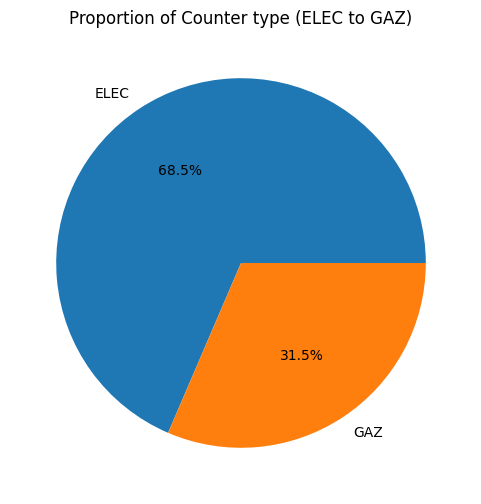

In [ ]:
C=invoice_train['counter_type'].tolist()
elec=C.count('ELEC')*100/len(C)
gaz=C.count('GAZ')*100/len(C)
plt.figure(figsize=(6,6))
plt.pie([elec,gaz], labels = ['ELEC','GAZ'],autopct='%1.1f%%')
plt.title("Proportion of Counter type (ELEC to GAZ)")
plt.show()

Text(0, 0.5, 'counter_number')

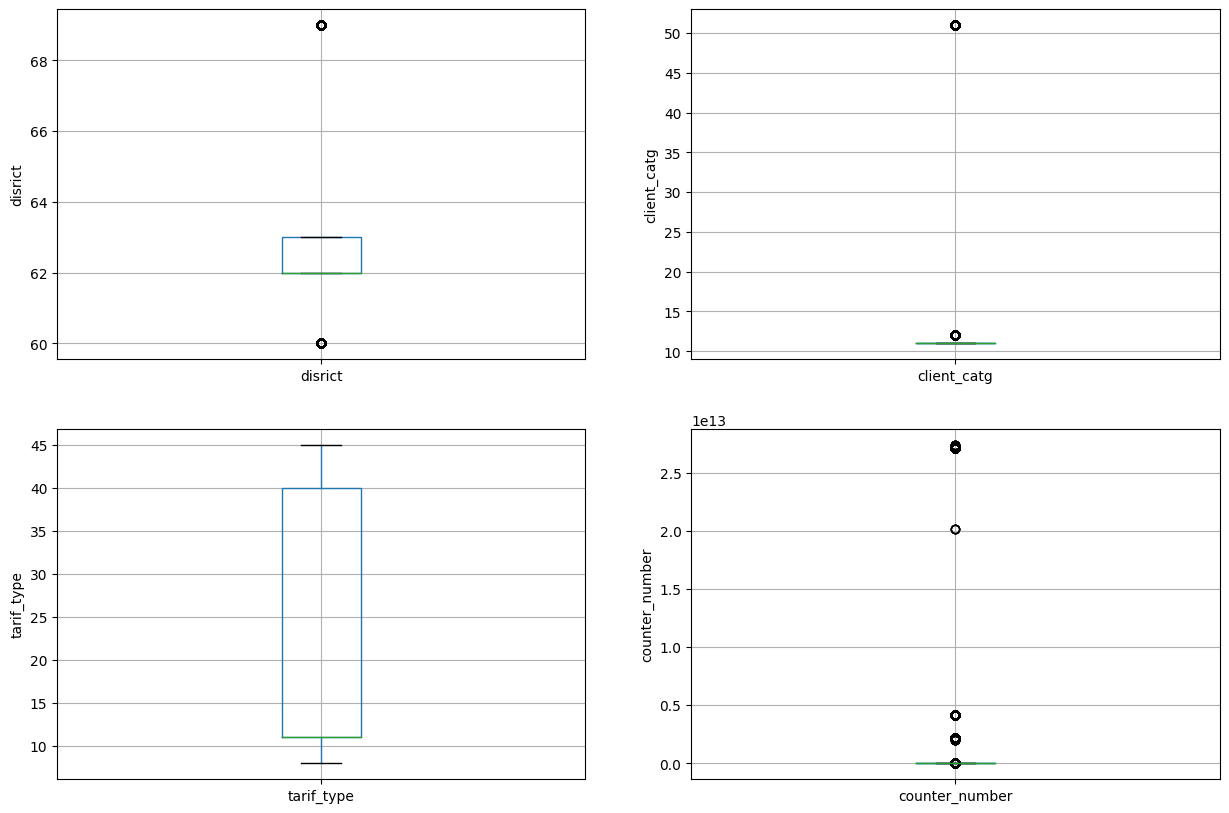

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = dataFrame.boxplot(column='disrict')
fig.set_title('')
fig.set_ylabel('disrict')

plt.subplot(2, 2, 2)
fig = dataFrame.boxplot(column='client_catg')
fig.set_title('')
fig.set_ylabel('client_catg')


plt.subplot(2, 2, 3)
fig = dataFrame.boxplot(column='tarif_type')
fig.set_title('')
fig.set_ylabel('tarif_type')


plt.subplot(2, 2, 4)
fig = dataFrame.boxplot(column='counter_number')
fig.set_title('')
fig.set_ylabel('counter_number')

Text(0, 0.5, 'consommation_level_1')

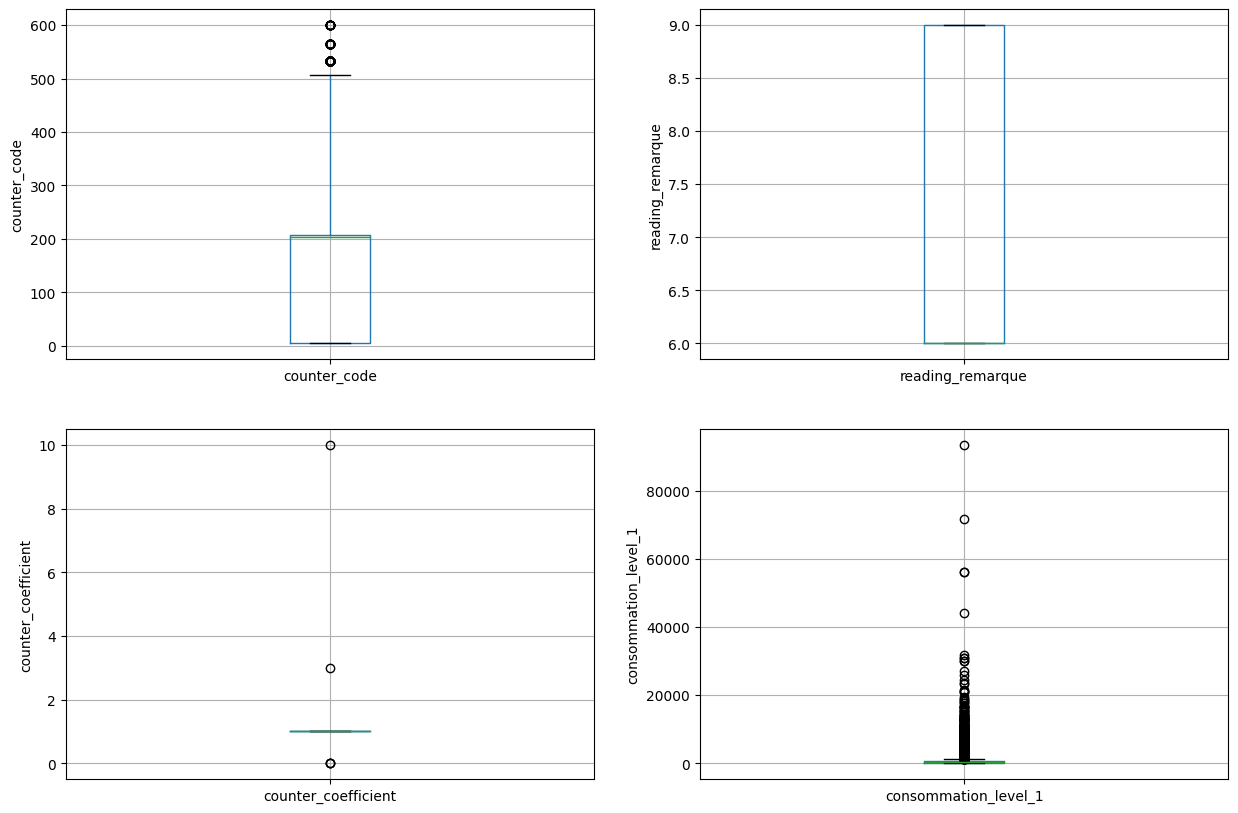

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = dataFrame.boxplot(column='counter_code')
fig.set_title('')
fig.set_ylabel('counter_code')


plt.subplot(2, 2, 2)
fig = dataFrame.boxplot(column='reading_remarque')
fig.set_title('')
fig.set_ylabel('reading_remarque')


plt.subplot(2, 2, 3)
fig = dataFrame.boxplot(column='counter_coefficient')
fig.set_title('')
fig.set_ylabel('counter_coefficient')


plt.subplot(2, 2, 4)
fig = dataFrame.boxplot(column='consommation_level_1')
fig.set_title('')
fig.set_ylabel('consommation_level_1')

Text(0, 0.5, 'old_index')

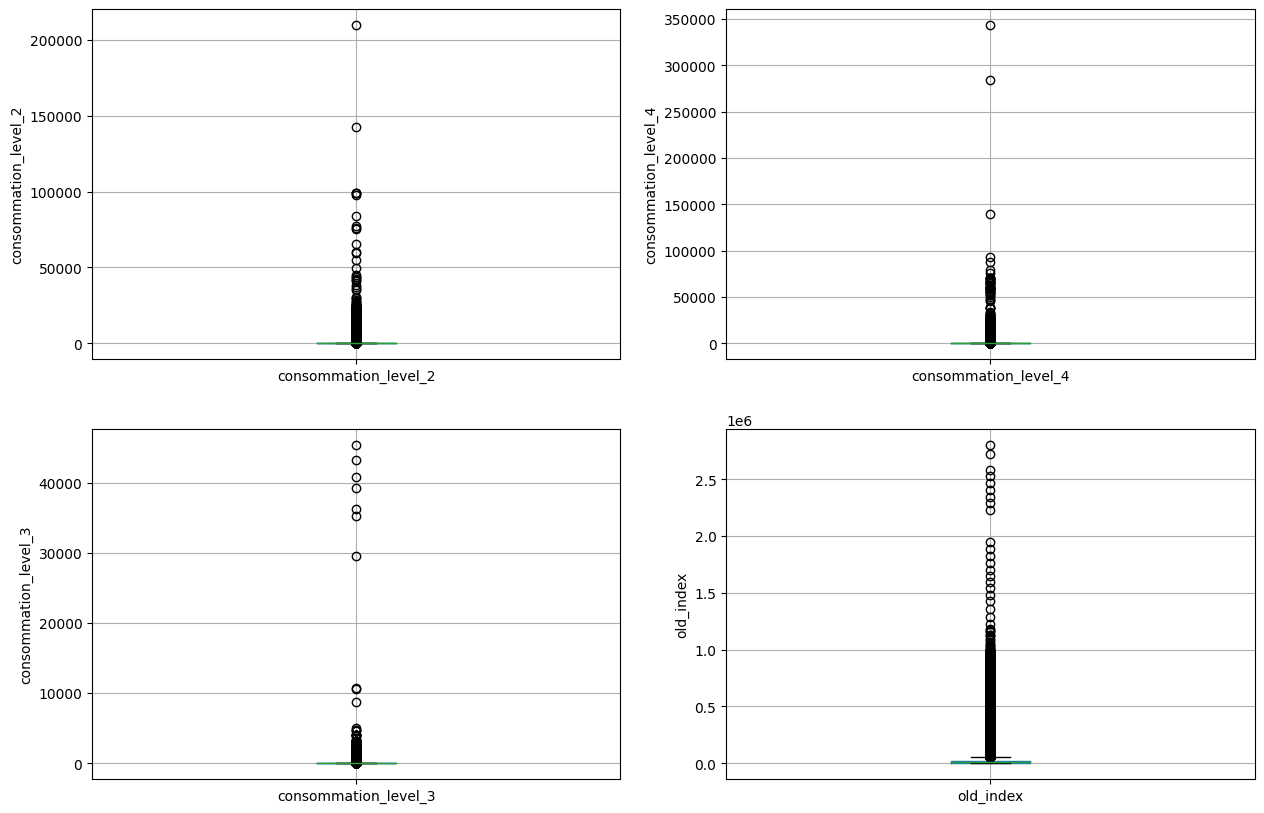

In [ ]:
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = dataFrame.boxplot(column='consommation_level_2')
fig.set_title('')
fig.set_ylabel('consommation_level_2')


plt.subplot(2, 2, 2)
fig = dataFrame.boxplot(column='consommation_level_4')
fig.set_title('')
fig.set_ylabel('consommation_level_4')


plt.subplot(2, 2, 3)
fig = dataFrame.boxplot(column='consommation_level_3')
fig.set_title('')
fig.set_ylabel('consommation_level_3')


plt.subplot(2, 2, 4)
fig = dataFrame.boxplot(column='old_index')
fig.set_title('')
fig.set_ylabel('old_index')

Text(0, 0.5, 'months_number')

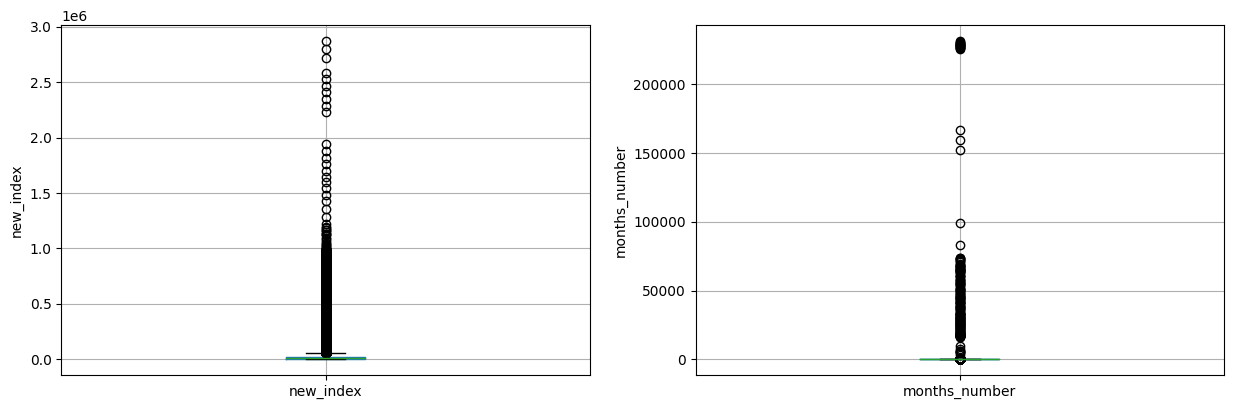

In [ ]:
plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = dataFrame.boxplot(column='new_index')
fig.set_title('')
fig.set_ylabel('new_index')


plt.subplot(2, 2, 2)
fig = dataFrame.boxplot(column='months_number')
fig.set_title('')
fig.set_ylabel('months_number')

In [ ]:
IQR = dataFrame.consommation_level_1.quantile(0.75) - dataFrame.consommation_level_1.quantile(0.25)
Lower_fence = dataFrame.consommation_level_1.quantile(0.25) - (IQR * 3)
Upper_fence = dataFrame.consommation_level_1.quantile(0.75) + (IQR * 3)
print('consommation_level_1 outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

consommation_level_1 outliers are values < -1488.0 or > 2166.0


Check the distribution of variables

Text(0.5, 0, 'region')

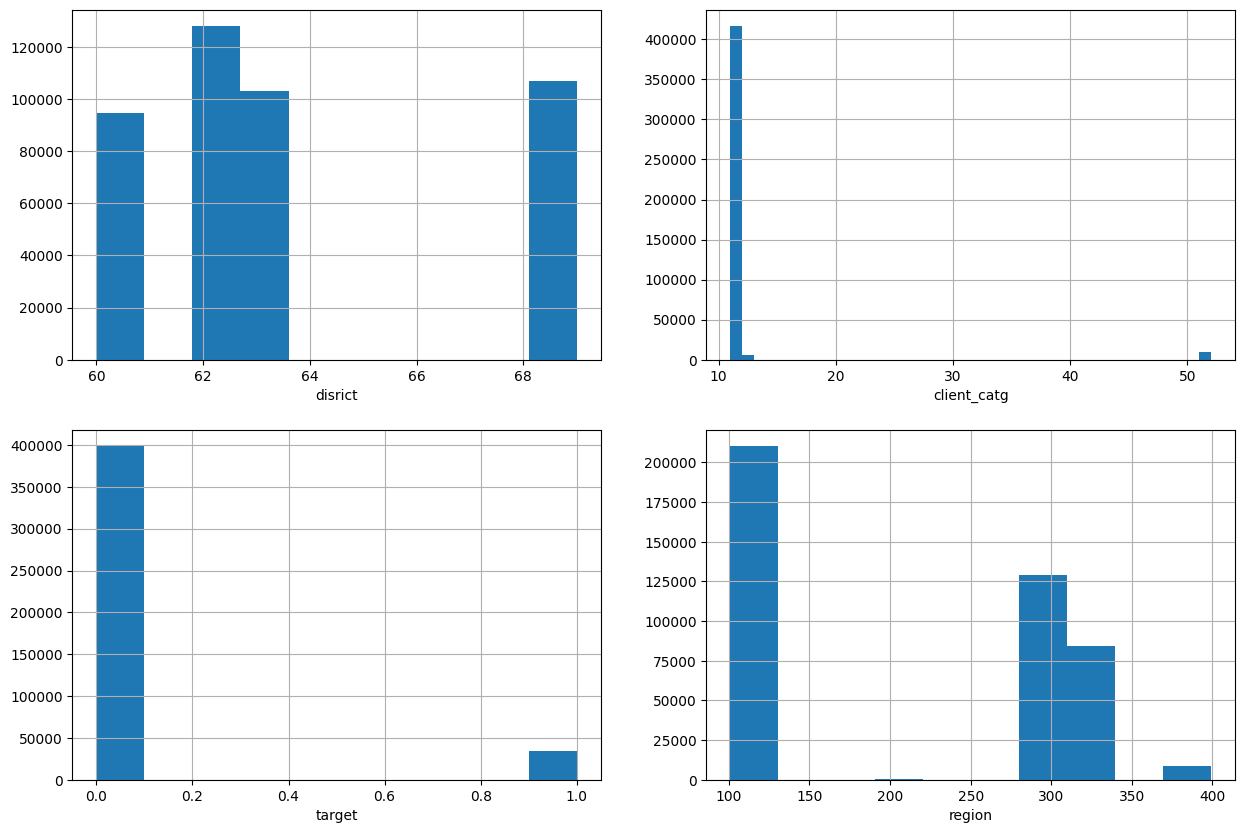

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = dataFrame.disrict.hist(bins=10)
fig.set_xlabel('disrict')


plt.subplot(2, 2, 2)
fig = dataFrame.client_catg.hist(bins=[11,12,13, 51, 52])
fig.set_xlabel('client_catg')


plt.subplot(2, 2, 3)
fig = dataFrame.target.hist(bins=10)
fig.set_xlabel('target')


plt.subplot(2, 2, 4)
fig = dataFrame.region.hist(bins=10)
fig.set_xlabel('region')

Text(0.5, 0, 'counter_code')

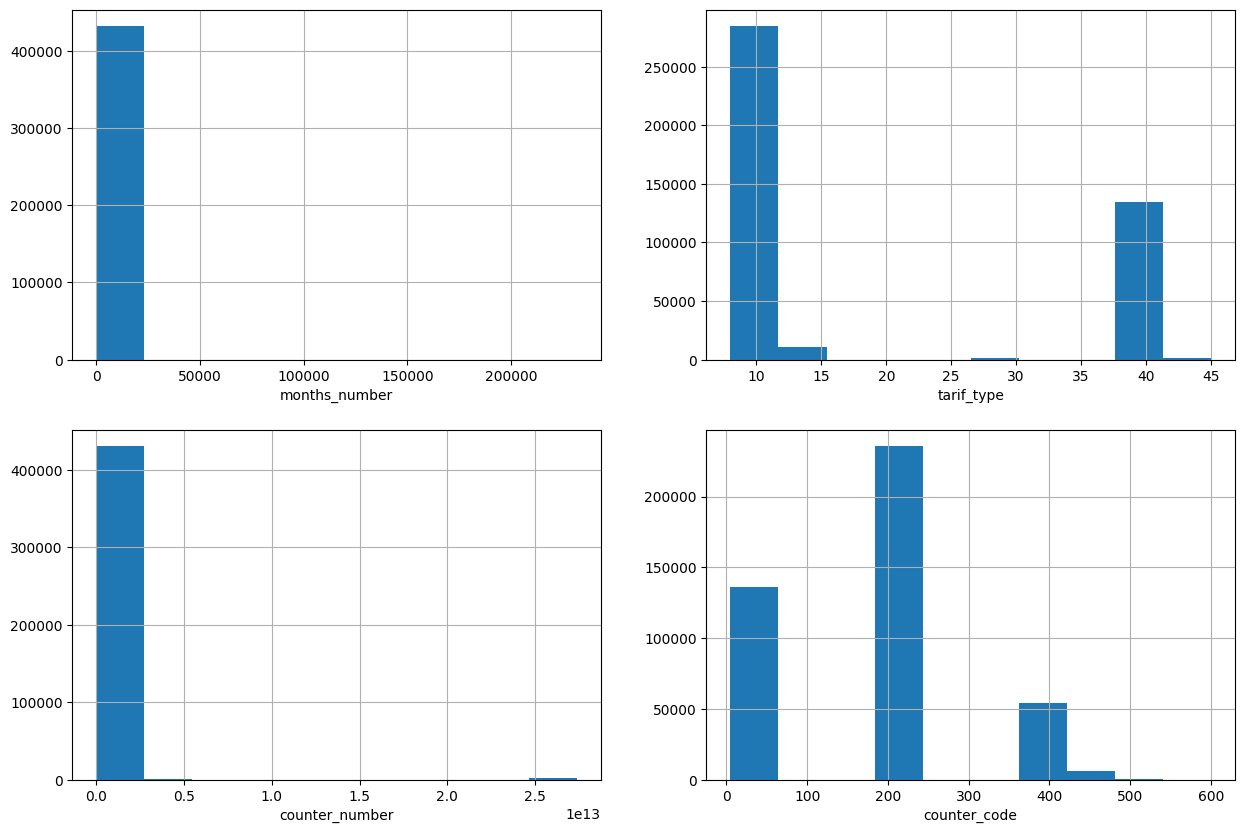

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = dataFrame.months_number.hist(bins=10)
fig.set_xlabel('months_number')


plt.subplot(2, 2, 2)
fig = dataFrame.tarif_type.hist(bins=10)
fig.set_xlabel('tarif_type')


plt.subplot(2, 2, 3)
fig = dataFrame.counter_number.hist(bins=10)
fig.set_xlabel('counter_number')


plt.subplot(2, 2, 4)
fig = dataFrame.counter_code.hist(bins=10)
fig.set_xlabel('counter_code')

Text(0.5, 0, 'consommation_level_2')

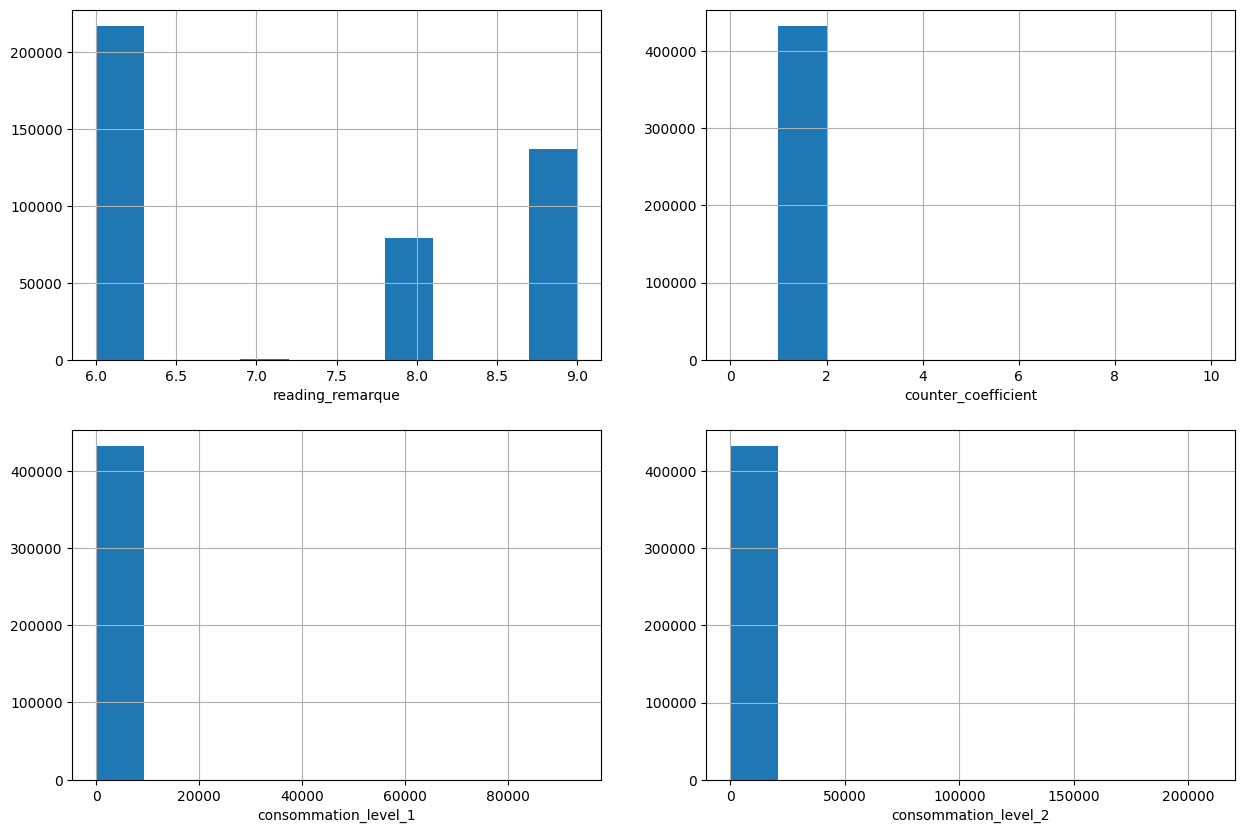

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = dataFrame.reading_remarque.hist(bins=10)
fig.set_xlabel('reading_remarque')


plt.subplot(2, 2, 2)
fig = dataFrame.counter_coefficient.hist(bins=10)
fig.set_xlabel('counter_coefficient')


plt.subplot(2, 2, 3)
fig = dataFrame.consommation_level_1.hist(bins=10)
fig.set_xlabel('consommation_level_1')


plt.subplot(2, 2, 4)
fig = dataFrame.consommation_level_2.hist(bins=10)
fig.set_xlabel('consommation_level_2')

Text(0.5, 0, 'new_index')

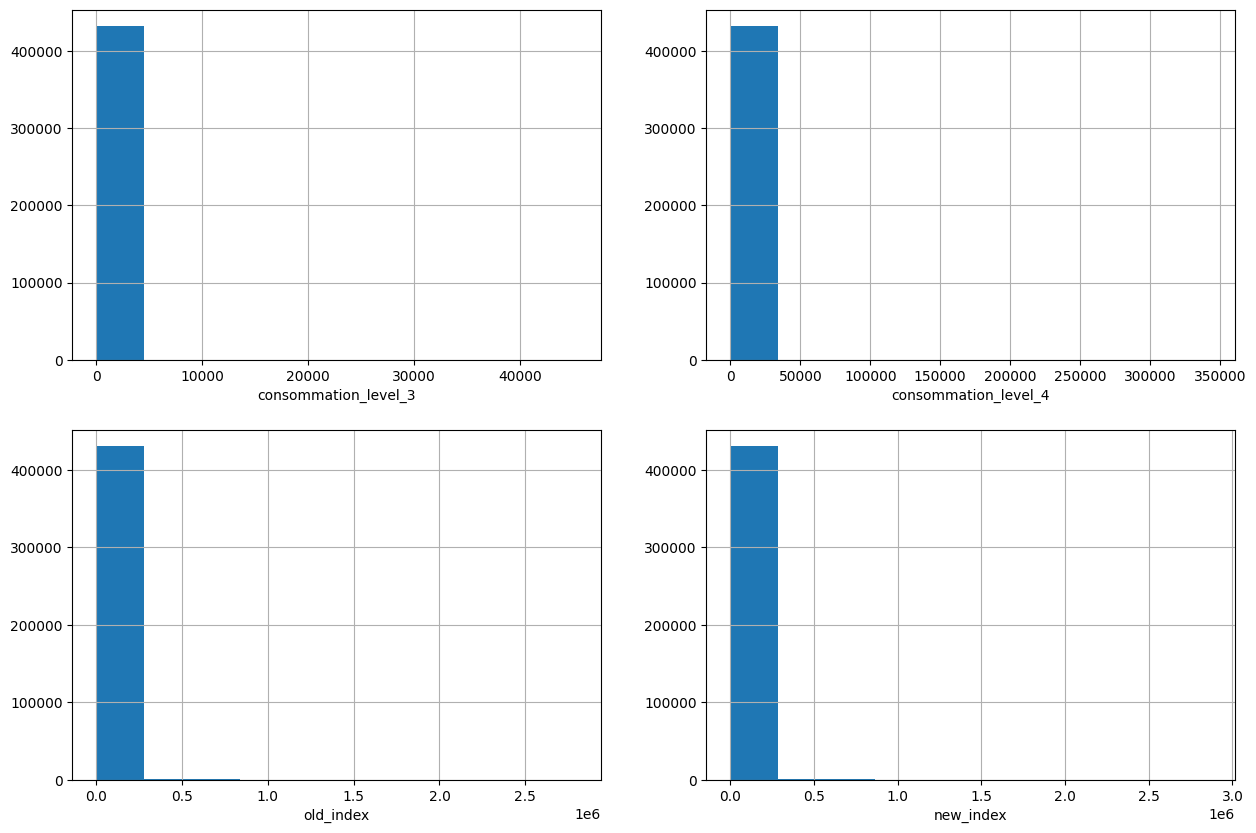

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = dataFrame.consommation_level_3.hist(bins=10)
fig.set_xlabel('consommation_level_3')


plt.subplot(2, 2, 2)
fig = dataFrame.consommation_level_4.hist(bins=10)
fig.set_xlabel('consommation_level_4')


plt.subplot(2, 2, 3)
fig = dataFrame.old_index.hist(bins=10)
fig.set_xlabel('old_index')


plt.subplot(2, 2, 4)
fig = dataFrame.new_index.hist(bins=10)
fig.set_xlabel('new_index')

Relationship between target and varblies

In [ ]:
cols = ['disrict','client_catg' , 'region' , 'tarif_type' , 'counter_statue' ,'reading_remarque',
       'counter_coefficient', 'counter_type']

for col in cols:
    print('Count samples for each value :\n', dataFrame[col].value_counts())
    print('\n',dataFrame.groupby([col, 'target']).size())
    print("=================================")

Count samples for each value :
 62    127849
69    106902
63    103211
60     94564
Name: disrict, dtype: int64

 disrict  target
60       0.0        89722
         1.0         4842
62       0.0       119685
         1.0         8164
63       0.0        93537
         1.0         9674
69       0.0        95450
         1.0        11452
dtype: int64
Count samples for each value :
 11    416192
51      9911
12      6423
Name: client_catg, dtype: int64

 client_catg  target
11           0.0       385122
             1.0        31070
12           0.0         5971
             1.0          452
51           0.0         7301
             1.0         2610
dtype: int64
Count samples for each value :
 101    103483
311     46492
104     39064
301     31406
107     30999
103     28657
303     19213
306     18287
304     15722
312     15353
310     15040
302     12336
309     11787
305      9188
307      7451
313      7241
371      5661
105      5216
308      3738
106      2737
372      1954
379  

<Figure size 640x480 with 0 Axes>

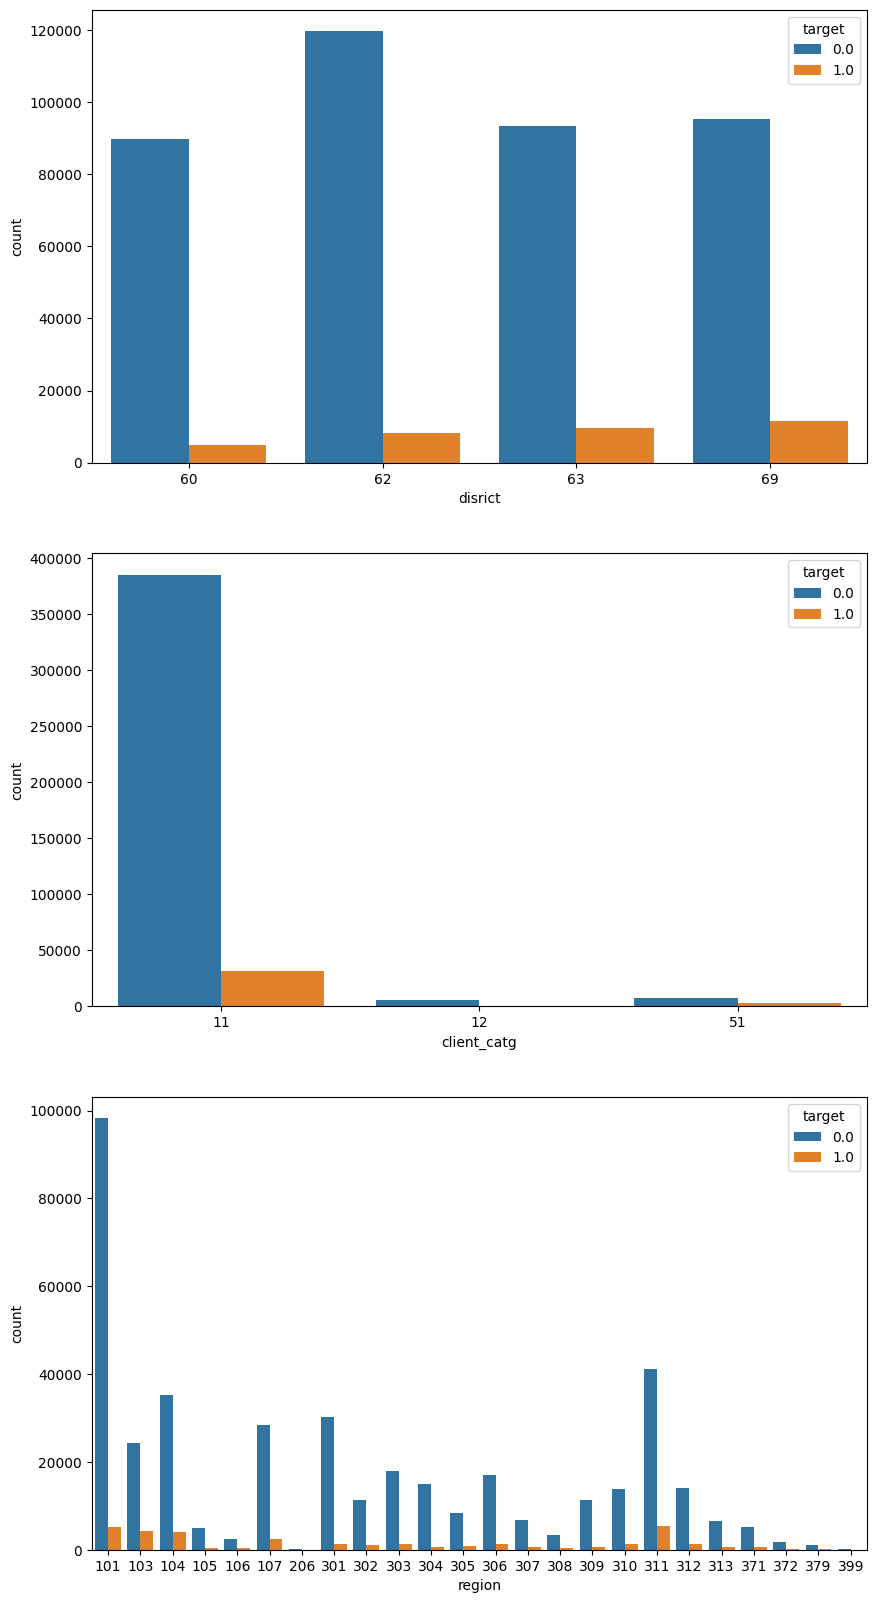

In [ ]:
cols = ['disrict','client_catg','region']
plt.clf()
plt.figure(figsize=(10, 20))
for i, col in enumerate(cols):
    plt.subplot(len(cols),1, i+1)
    sns.countplot(x=col, data=dataFrame, hue='target')
plt.show()

In [ ]:
df_corr = pd.DataFrame(dataFrame.corr())
df_corr['target'].sort_values(ascending=False)

<ipython-input-59-94c5faa884bd>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = pd.DataFrame(dataFrame.corr())


target                  1.000000
client_catg             0.104699
disrict                 0.072494
counter_number          0.029973
new_index               0.021360
old_index               0.021222
tarif_type              0.015310
consommation_level_3    0.015269
Day_creation_date       0.014173
consommation_level_1    0.013224
consommation_level_4    0.010209
reading_remarque        0.008111
consommation_level_2    0.007091
counter_statue          0.004891
year_invoice_date       0.001928
region                  0.000883
counter_coefficient    -0.000380
counter_code           -0.000492
months_number          -0.004155
Month_creation_date    -0.009315
Day_invoice_date       -0.020749
year_creation_date     -0.033045
Name: target, dtype: float64

<ipython-input-60-1f529986e087>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataFrame.corr(),square=True, annot=True,cmap='YlGnBu')


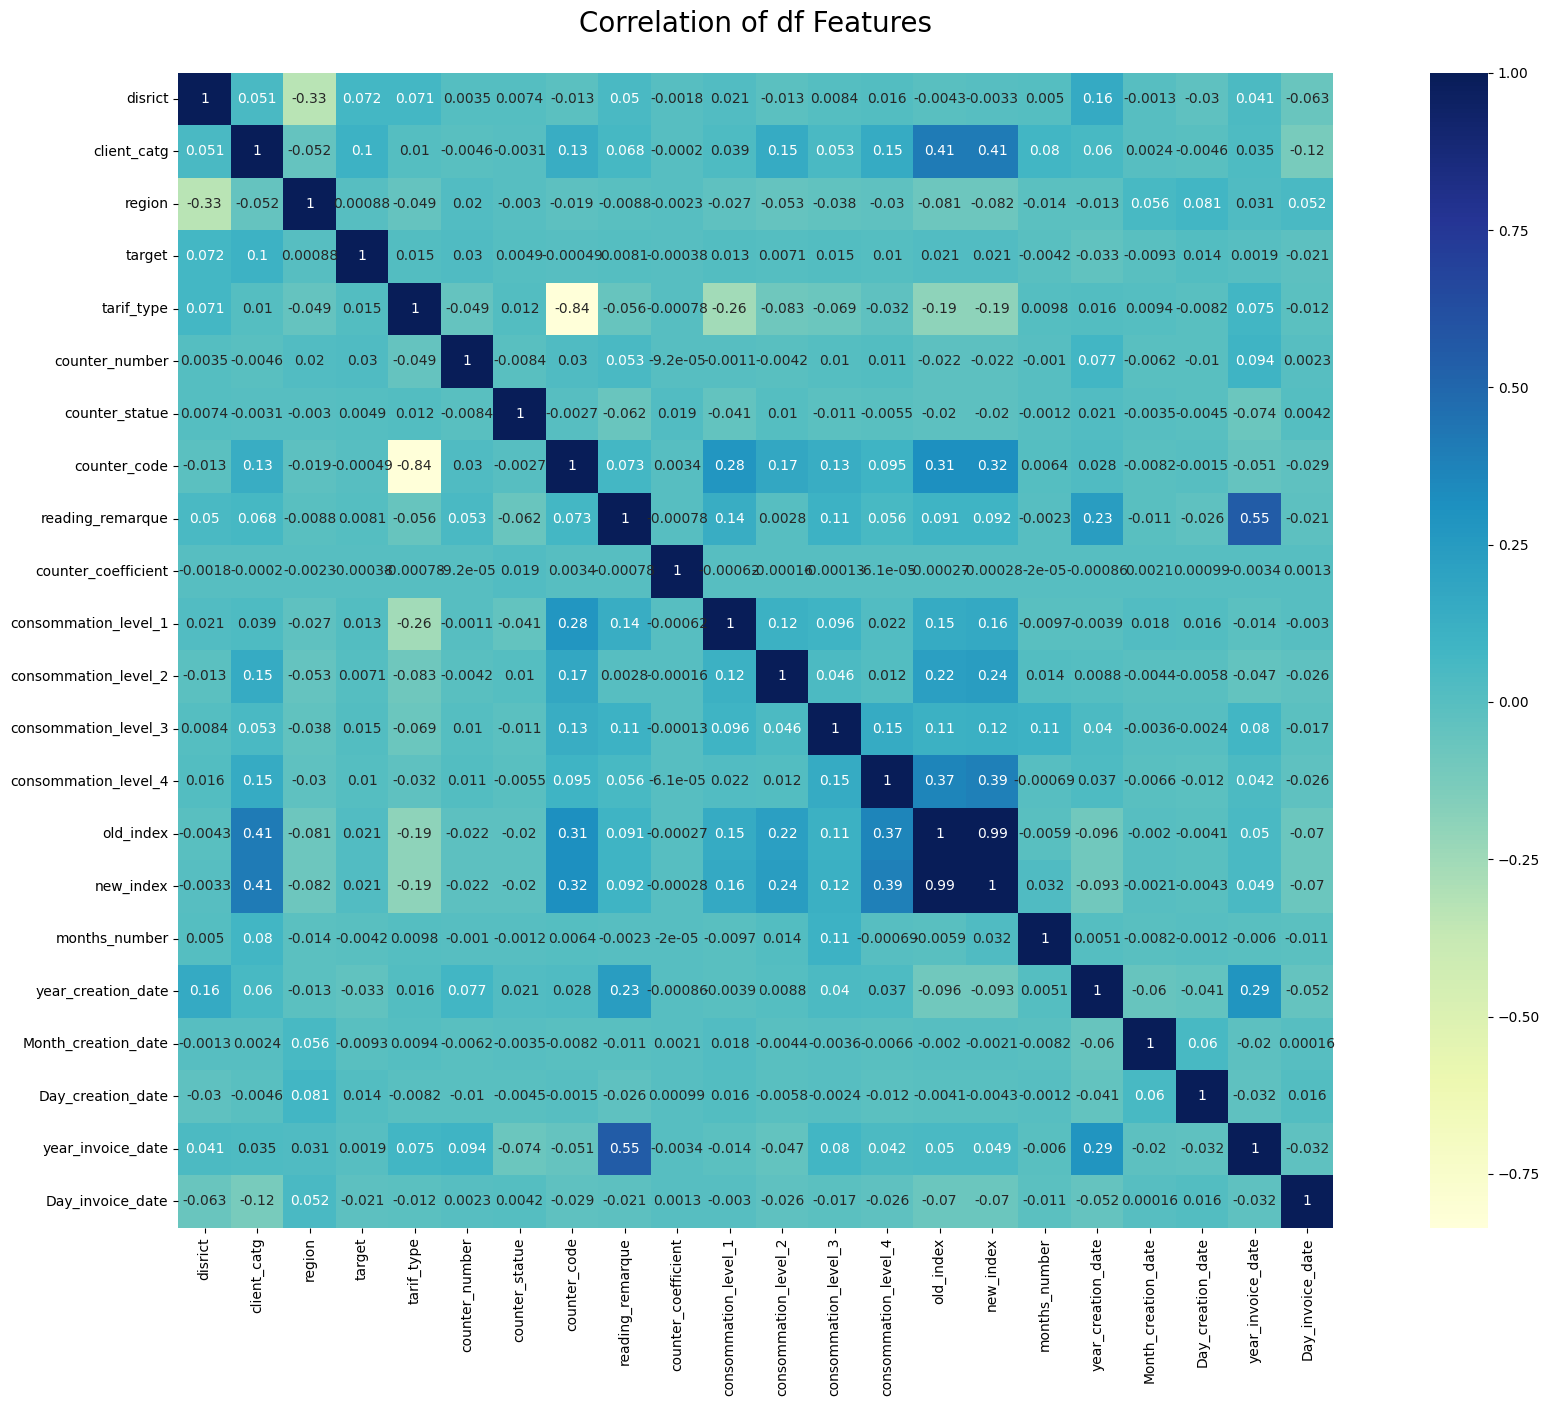

In [ ]:
import seaborn as sns
fig, ax=plt.subplots()
fig.set_size_inches(25,15)
sns.heatmap(dataFrame.corr(),square=True, annot=True,cmap='YlGnBu')
plt.title('Correlation of df Features\n',fontsize=20  );

#4- Data preprocessing and Declare feature vector and target variable

In [ ]:
def feature_change(cl, inv):

    cl['client_catg'] = cl['client_catg'].astype('category')
    cl['disrict'] = cl['disrict'].astype('category')
    cl['region'] = cl['region'].astype('category')
    cl['region_group'] = cl['region'].apply(lambda x: 100 if x<100 else 300 if x>300 else 200)
    cl['creation_date'] = pd.to_datetime(cl['creation_date'])

    cl['coop_time'] = (2019 - cl['creation_date'].dt.year)*12 - cl['creation_date'].dt.month

    inv['counter_type'] = inv['counter_type'].map({"ELEC":1,"GAZ":0})
    inv['counter_statue'] = inv['counter_statue'].map({0:0,1:1,2:2,3:3,4:4,5:5,769:5,'0':0,'5':5,'1':1,'4':4,'A':0,618:5,269375:5,46:5,420:5})

    inv['invoice_date'] = pd.to_datetime(inv['invoice_date'], dayfirst=True)
    inv['invoice_month'] = inv['invoice_date'].dt.month
    inv['invoice_year'] = inv['invoice_date'].dt.year
    inv['is_weekday'] = ((pd.DatetimeIndex(inv.invoice_date).dayofweek) // 5 == 1).astype(float)
    inv['delta_index'] = inv['new_index'] - inv['old_index']

    return cl, inv

In [ ]:
client_train1, invoice_train1 = feature_change(client_train, invoice_train)
client_test1, invoice_test1 = feature_change(client_test, invoice_test)

<ipython-input-75-54fdf2b48168>:7: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  cl['creation_date'] = pd.to_datetime(cl['creation_date'])
<ipython-input-75-54fdf2b48168>:7: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  cl['creation_date'] = pd.to_datetime(cl['creation_date'])


In [ ]:
def agg_feature(invoice, client_df, agg_stat):

    invoice['delta_time'] = invoice.sort_values(['client_id','invoice_date']).groupby('client_id')['invoice_date'].diff().dt.days.reset_index(drop=True)
    agg_trans = invoice.groupby('client_id')[agg_stat+['delta_time']].agg(['mean','std','min','max'])

    agg_trans.columns = ['_'.join(col).strip() for col in agg_trans.columns.values]
    agg_trans.reset_index(inplace=True)

    df = invoice.groupby('client_id').size().reset_index(name='transactions_count')
    agg_trans = pd.merge(df, agg_trans, on='client_id', how='left')

    weekday_avg = invoice.groupby('client_id')[['is_weekday']].agg(['mean'])
    weekday_avg.columns = ['_'.join(col).strip() for col in weekday_avg.columns.values]
    weekday_avg.reset_index(inplace=True)
    client_df = pd.merge(client_df, weekday_avg, on='client_id', how='left')

    full_df = pd.merge(client_df, agg_trans, on='client_id', how='left')

    full_df['invoice_per_cooperation'] = full_df['transactions_count'] / full_df['coop_time']

    return full_df

In [ ]:
agg_stat_columns = [
 'tarif_type',
 'counter_number',
 'counter_statue',
 'counter_code',
 'reading_remarque',
 'consommation_level_1',
 'consommation_level_2',
 'consommation_level_3',
 'consommation_level_4',
 'old_index',
 'new_index',
 'months_number',
 'counter_type',
 'invoice_month',
 'invoice_year',
 'delta_index'
]

train_df1 = agg_feature(invoice_train1, client_train1, agg_stat_columns)
test_df1 = agg_feature(invoice_test1, client_test1, agg_stat_columns)

In [ ]:
def new_features(df):

    for col in agg_stat_columns:
        df[col+'_range'] = df[col+'_max'] - df[col+'_min']
        df[col+'_max_mean'] = df[col+'_max']/df[col+'_mean']

    return df

def drop(df):

    col_drop = ['client_id', 'creation_date']
    for col in col_drop:
        df.drop([col], axis=1, inplace=True)
    return df

In [ ]:
train_df2 = new_features(train_df1)
test_df2 = new_features(test_df1)

In [ ]:
print('Initial number of columns: ', len(client_train.columns)+len(invoice_train.columns))
print('Number of columns now: ', len(train_df2.columns))

Initial number of columns:  29
Number of columns now:  111


In [ ]:
train_df = drop(train_df2)
test_df = drop(test_df2)

In [ ]:
y = train_df['target']
X = train_df.drop('target',axis=1)

feature_name = X.columns.tolist()

In [ ]:
drop_col=['reading_remarque_max','counter_statue_min','counter_type_min','counter_type_max','counter_type_range',
          'tarif_type_max', 'delta_index_min', 'consommation_level_4_mean']

X = X.drop(drop_col, axis=1)
test_df = test_df.drop(drop_col, axis=1)


#5 - Model Training

In [ ]:
seed=47
category_cols = ['disrict', 'client_catg', 'region']

In [ ]:
model = LGBMClassifier(random_state=seed, n_estimators=830,num_leaves=454, max_depth=61,
                       learning_rate=0.006910869038433314, min_split_gain=0.00667926424629105,
                       feature_fraction=0.3764303138879782, bagging_freq=8)

stkfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

def calc(X, y, model, cv):
    res=[]
    local_probs=pd.DataFrame()
    probs = pd.DataFrame()

    for i, (tdx, vdx) in enumerate(cv.split(X, y)):
        X_train, X_valid, y_train, y_valid = X.iloc[tdx], X.iloc[vdx], y[tdx], y[vdx]
        model.fit(X_train, y_train,
                 eval_set=[(X_train, y_train), (X_valid, y_valid)],
                 early_stopping_rounds=30, verbose=False)

        preds = model.predict_proba(X_valid)
        oof_predict = model.predict_proba(test_df)
        local_probs['fold_%i'%i] = oof_predict[:,1]
        res.append(roc_auc_score(y_valid, preds[:,1]))

    print('ROC AUC:', round(np.mean(res), 6))
    local_probs['res'] = local_probs.mean(axis=1)
    probs['target'] = local_probs['res']

    return probs

#6 - Predictions

In [ ]:
# Get the features in X.columns that are not in test_df.columns
missing_features = set(X.columns) - set(test_df.columns)

# Print the missing features
print(missing_features)

set()


In [ ]:
%%time
probs = calc(X, y, model, stkfold)

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] feature_fraction is set=0.3764303138879782, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3764303138879782
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8


/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' 

[LightGBM] [Warning] feature_fraction is set=0.3764303138879782, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3764303138879782
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8


/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' 

[LightGBM] [Warning] feature_fraction is set=0.3764303138879782, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3764303138879782
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8


/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' 

[LightGBM] [Warning] feature_fraction is set=0.3764303138879782, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3764303138879782
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8


/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' 

[LightGBM] [Warning] feature_fraction is set=0.3764303138879782, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.3764303138879782
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8


/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


ROC AUC: 0.675986
CPU times: user 7min 11s, sys: 3.78 s, total: 7min 14s
Wall time: 4min 27s


In [ ]:
sample_submission = pd.read_csv('/content/SampleSubmission.csv')
results = pd.DataFrame({
        "client_id": sample_submission["client_id"],
        "target": probs['target']
    })

In [ ]:
results.head(100)

,client_id,target
0,test_Client_0,0.012727
1,test_Client_1,0.067461
2,test_Client_10,0.025567
3,test_Client_100,0.005719
4,test_Client_1000,0.024577
...,...,...
95,test_Client_10082,0.007765
96,test_Client_10083,0.033316
97,test_Client_10084,0.005550
98,test_Client_10085,0.005243
